In [1]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm 
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import glob

In [2]:
seed = 42
np.random.seed = seed

In [3]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [16]:
TRAIN_PATH =  "C:/Users/RAZER/Downloads/dataset/HAM/train/"
TEST_PATH = "C:/Users/RAZER/Downloads/dataset/HAM/test/"

train_images_list = sorted(glob.glob(TRAIN_PATH+"/images/*"))
train_mask_list = sorted(glob.glob(TRAIN_PATH+"/mask/*"))
test_images_list = sorted(glob.glob(TEST_PATH+"/images/*"))
test_mask_list = sorted(glob.glob(TEST_PATH+"/mask/*"))


train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [22]:
for i in range(10):
    print(train_images_list[i],train_mask_list[i])

C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024306.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\ISIC_0024306_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024308.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\ISIC_0024308_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024309.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\ISIC_0024309_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024319.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\ISIC_0024319_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024320.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\ISIC_0024320_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024322.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\ISIC_0024322_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024323.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\I

In [23]:
for i in range(10):
    print(test_images_list[i],test_mask_list[i])

C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024307.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024307_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024310.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024310_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024311.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024311_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024312.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024312_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024313.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024313_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024314.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024314_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024315.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024315_se

In [32]:
print(len(train_images_list),len(train_mask_list),len(test_images_list),len(test_mask_list))

8012 8012 2003 2003


In [33]:
l_train = len(train_images_list)
l_test = len(test_images_list)

In [83]:
X_train = np.zeros((l_train, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train =np.zeros((l_train, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
X_test = np.zeros((l_test, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((l_test, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)

In [84]:
Y_train.shape

(8012, 128, 128, 1)

#Resizing Images

**Train Images**

In [86]:
#sizes_train_mask = []
n = 0
print('Resizing test images') 
for path in tqdm(train_images_list):
    img = imread(path)[:,:,:IMG_CHANNELS]
    #sizes_train_mask.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    n+=1

print('Done!')

Resizing test images


100%|██████████| 8012/8012 [02:30<00:00, 53.31it/s]

Done!


**Train Mask**

In [87]:

#sizes_train_mask = []
n = 0
print('Resizing train mask') 
for path in tqdm(train_mask_list):
    img = imread(path)
    #sizes_train_mask.append([img.shape[0], img.shape[1]])
    img =  resize(img, (IMG_HEIGHT, IMG_WIDTH,1), mode='constant', preserve_range=True)
    Y_train[n] = img
    n+=1

print('Done!')

Resizing train mask


100%|██████████| 8012/8012 [00:46<00:00, 172.50it/s]

Done!


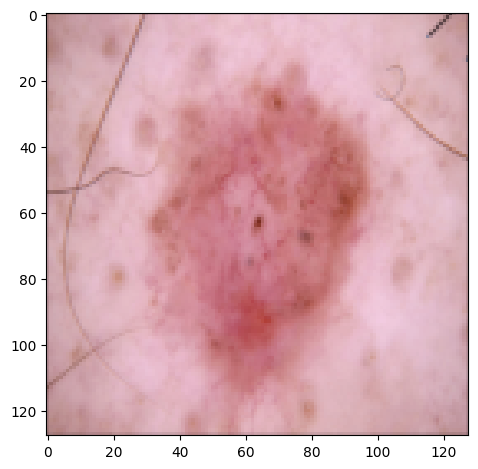

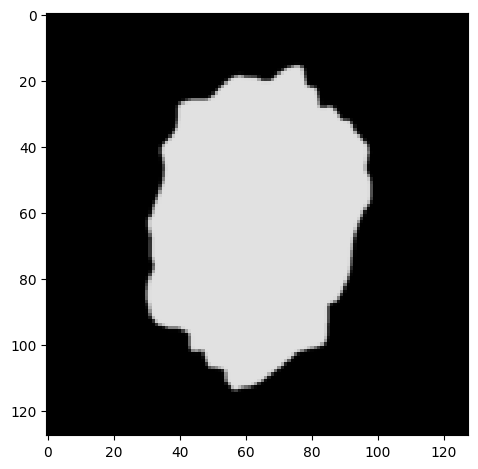

In [90]:
image_x = 10
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

**Test Images**                     

In [74]:
#sizes_train_mask = []
n = 0
print('Resizing test images') 
for path in tqdm(test_images_list):
    img = imread(path)[:,:,:IMG_CHANNELS]
    #sizes_train_mask.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img
    n+=1

print('Done!')

Resizing test images


100%|██████████| 2003/2003 [00:49<00:00, 40.09it/s]

Done!


**Test Mask**

In [75]:
#sizes_train_mask = []
n = 0
print('Resizing test images') 
for path in tqdm(test_mask_list):
    img = imread(path)
    #sizes_train_mask.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH,1), mode='constant', preserve_range=True)
    Y_test[n] = img
    n+=1

print('Done!')

Resizing test images


100%|██████████| 2003/2003 [00:29<00:00, 67.53it/s]

Done!


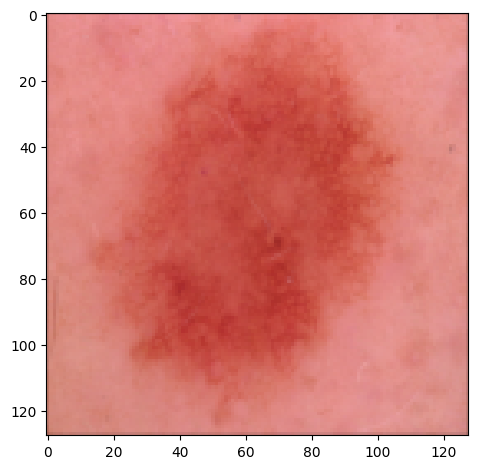

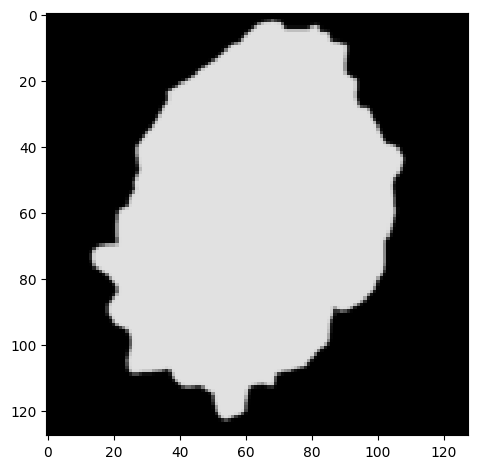

In [80]:
image_x = 7
imshow(X_test[image_x])
plt.show()
imshow(np.squeeze(Y_test[image_x]))
plt.show()

In [92]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((8012, 128, 128, 3),
 (2003, 128, 128, 3),
 (8012, 128, 128, 1),
 (2003, 128, 128, 1))